### NOTEBOOK CONTENTS

- plots of $\Omega_A$ sat. horizon for summer and winter seasons for BR and PI runs calculated using DEEP alg.
    one of two algs:
        shallow: arag. hor. is shallowest undersaturat. water
        deep: arag. hor. is shallowest undersaturat. water beneath all supersaturated water
        
(Previous analysis suggested that it doesn't matter which algorithm I use, so I went with the deep one (more conservative?))
   
- regional averages for the 3 runs as bar plot
- numbers comparisons
- the PI run seems to give some *very* deep horizons - visualisations of some average quantities.
- comparisons of horizons found in previous calculation and this one. difference may be that we didn't consider depth in this one (embarrasingly, can't find pyscript for original calculation). Am rerunning, considering depth, since it does matter - in quick point checks can have difference of 0.1 OmA.

#### Production of .nc documentation is found in: carbon_dev/PI_CARBON_PAPER/location_important_extracted_calculated_quantities.txt

#### These are calculated using OmAs that were calculated using a depth of 0. It does matter slightly whether you use the correct depth, so I am recalculating them...

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [10]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import pickle

import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




Text(0.5, 0.98, 'MASK of regions, input file')

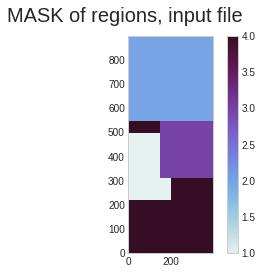

In [11]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


# Deep algorithm
#### Saturation horizon is below all supersaturated water....
    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
    Saturation horizon is below all supersaturated water....

In [12]:
OmA_deepAlg = { 'LA': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'BR': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'PI': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'}}

#LA
Oma_hor_deep_LA = nc.Dataset('../KEY_OMA/OMA_current_NCS/LA_OmA_horizon_DEEPALG_depth_0.nc')
OmArHORIZON_la_deepalg =  Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_la_deepalg =  np.concatenate([OmA_h_janfeb_la_deepalg,OmA_h_dec_la_deepalg])
OmA_h_summer_la_deepalg =  np.array(Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_summer_mean_la_deepalg =  np.nanmean(OmA_h_summer_la_deepalg,axis = 0)
OmA_h_winter_mean_la_deepalg =  np.nanmean(OmA_h_winter_la_deepalg,axis = 0)

#BR
Oma_hor_deep_BR = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA_horizon_DEEPALG_depth_0.nc')
OmArHORIZON_br_deepalg =  Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_br_deepalg =  np.concatenate([OmA_h_janfeb_br_deepalg,OmA_h_dec_br_deepalg])
OmA_h_summer_br_deepalg =  np.array(Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_winter_mean_br_deepalg =  np.nanmean(OmA_h_winter_br_deepalg,axis = 0)
OmA_h_summer_mean_br_deepalg =  np.nanmean(OmA_h_summer_br_deepalg,axis = 0)

##PI
Oma_hor_deep_PI = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA_horizon_DEEPALG_depth_0.nc')
OmArHORIZON_PI_deepalg =  Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][90,:,:]

OmA_h_janfeb_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][0:60,:,:])
OmA_h_dec_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][364-60:-1,:,:])
OmA_h_winter_PI_deepalg =  np.concatenate([OmA_h_janfeb_PI_deepalg,OmA_h_dec_PI_deepalg])
OmA_h_summer_PI_deepalg =  np.array(Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][134:243,:,:])

OmA_h_summer_mean_PI_deepalg =  np.nanmean(OmA_h_summer_PI_deepalg,axis = 0)
OmA_h_winter_mean_PI_deepalg =  np.nanmean(OmA_h_winter_PI_deepalg,axis = 0)



Text(0.5, 0.98, 'LA - BR (DEEP ALG)')

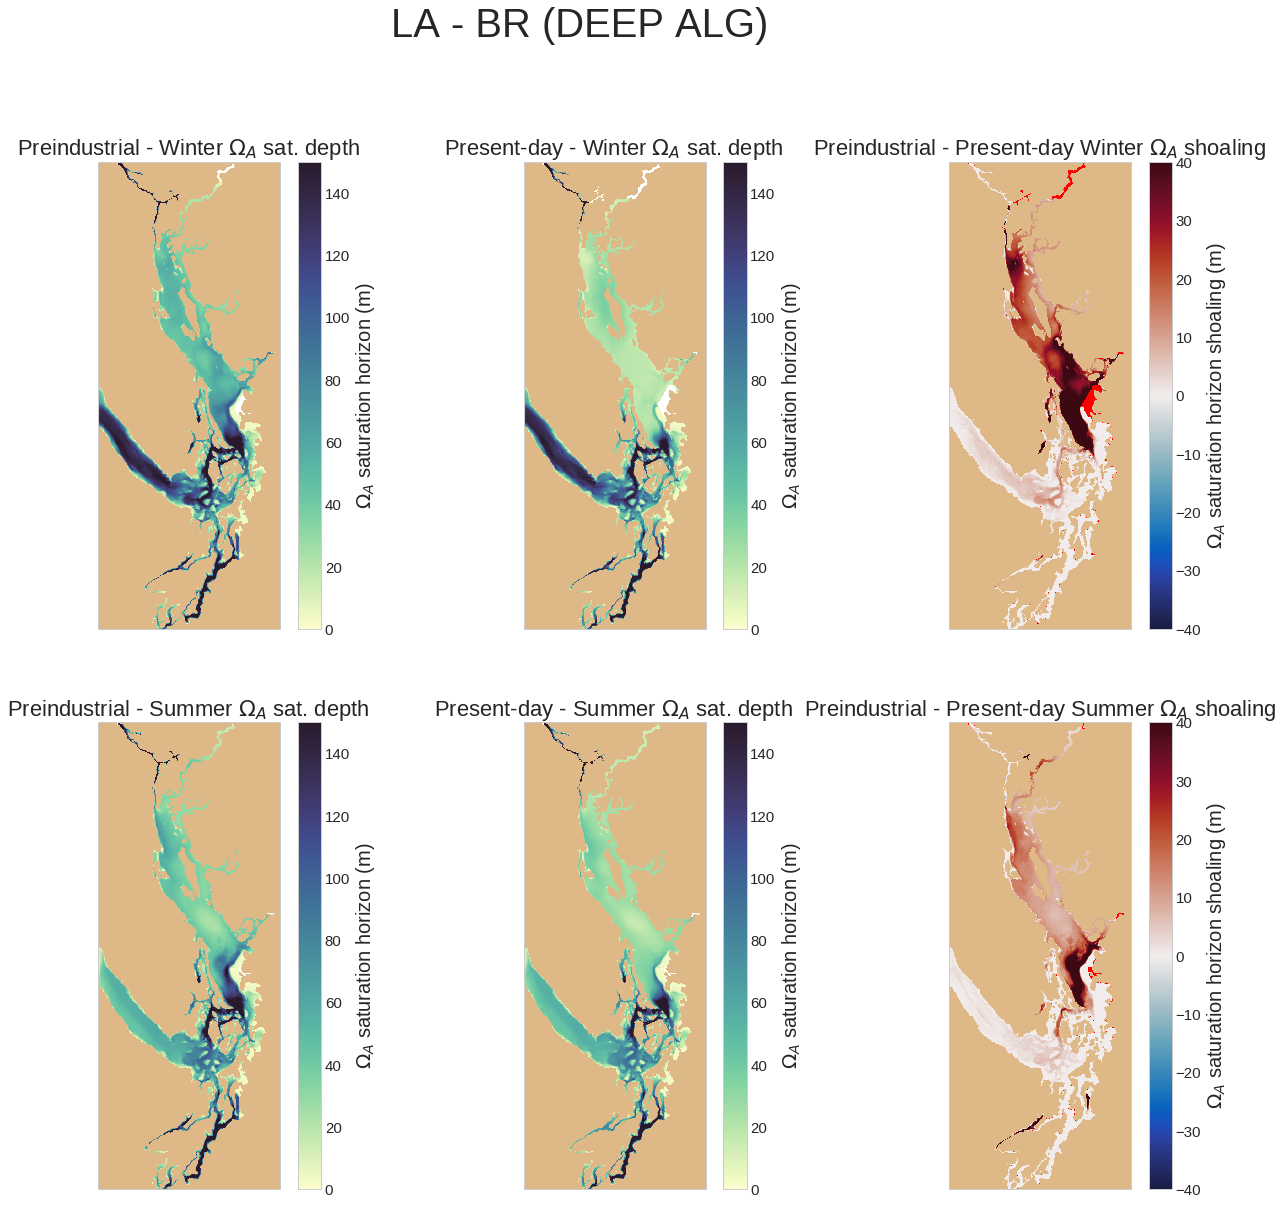

In [13]:

#

fig = plt.figure(figsize=(12*1.8,10.5*1.8))

ax1 = fig.add_subplot(2,3,1)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_la_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('Preindustrial - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,2)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_br_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)
 
ax3 = fig.add_subplot(2,3,3)
cmap = cm.cm.balance
tplt = OmA_h_winter_mean_la_deepalg - OmA_h_winter_mean_br_deepalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=15)
ax3.set_title('Preindustrial - Present-day Winter $\Omega_A$ shoaling', fontsize = 22)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)


ax1 = fig.add_subplot(2,3,4)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_la_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)

ax1.set_title('Preindustrial - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,5)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax3 = fig.add_subplot(2,3,6)
cmap = cm.cm.balance
tplt = OmA_h_summer_mean_la_deepalg - OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax3.set_title('Preindustrial - Present-day Summer $\Omega_A$ shoaling', fontsize = 22)
cbar = plt.colorbar(mesh)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)

cmap.set_bad('red')
cmap.set_bad('red')
plt.suptitle('LA - BR (DEEP ALG)', fontsize =40, va = 'center')



In [14]:


#

OmA_deepAlg_summer = { 'la': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                      'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_deepAlg_winter = { 'la': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                      'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    print('')
    print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_la_deepalg - OmA_h_summer_mean_br_deepalg)
    print('average summer sat. hor. (la): ', np.nanmean(OmA_h_summer_mean_la_deepalg[reg_mask]))
    OmA_deepAlg_summer['la'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_la_deepalg[reg_mask])
    print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask])
    print('la-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_la_deepalg - OmA_h_winter_mean_br_deepalg)
    print('average winter sat. hor. (la): ', np.nanmean(OmA_h_winter_mean_la_deepalg[reg_mask]))
    OmA_deepAlg_winter['la'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_la_deepalg[reg_mask])
    print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask])
    print('la-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    


JdF
average summer sat. hor. (la):  45.486782
average summer sat. hor (BR):  44.132675
la-BR shoaling summer:  1.3541011
average winter sat. hor. (la):  97.08348
average winter sat. hor (BR):  94.554825
la-BR shoaling winter:  2.6092527

N. Sog
average summer sat. hor. (la):  43.25846
average summer sat. hor (BR):  34.044353
la-BR shoaling summer:  9.233442
average winter sat. hor. (la):  46.570168
average winter sat. hor (BR):  30.545181
la-BR shoaling winter:  15.608211

S. Sog
average summer sat. hor. (la):  55.929604
average summer sat. hor (BR):  43.55997
la-BR shoaling summer:  12.424784
average winter sat. hor. (la):  62.438114
average winter sat. hor (BR):  37.481564
la-BR shoaling winter:  25.341412

Haro
average summer sat. hor. (la):  63.272987
average summer sat. hor (BR):  60.36671
la-BR shoaling summer:  2.9091127
average winter sat. hor. (la):  67.43631
average winter sat. hor (BR):  66.23699
la-BR shoaling winter:  1.2449558


Text(0.5, 0.98, 'PI - BR (DEEP ALG)')

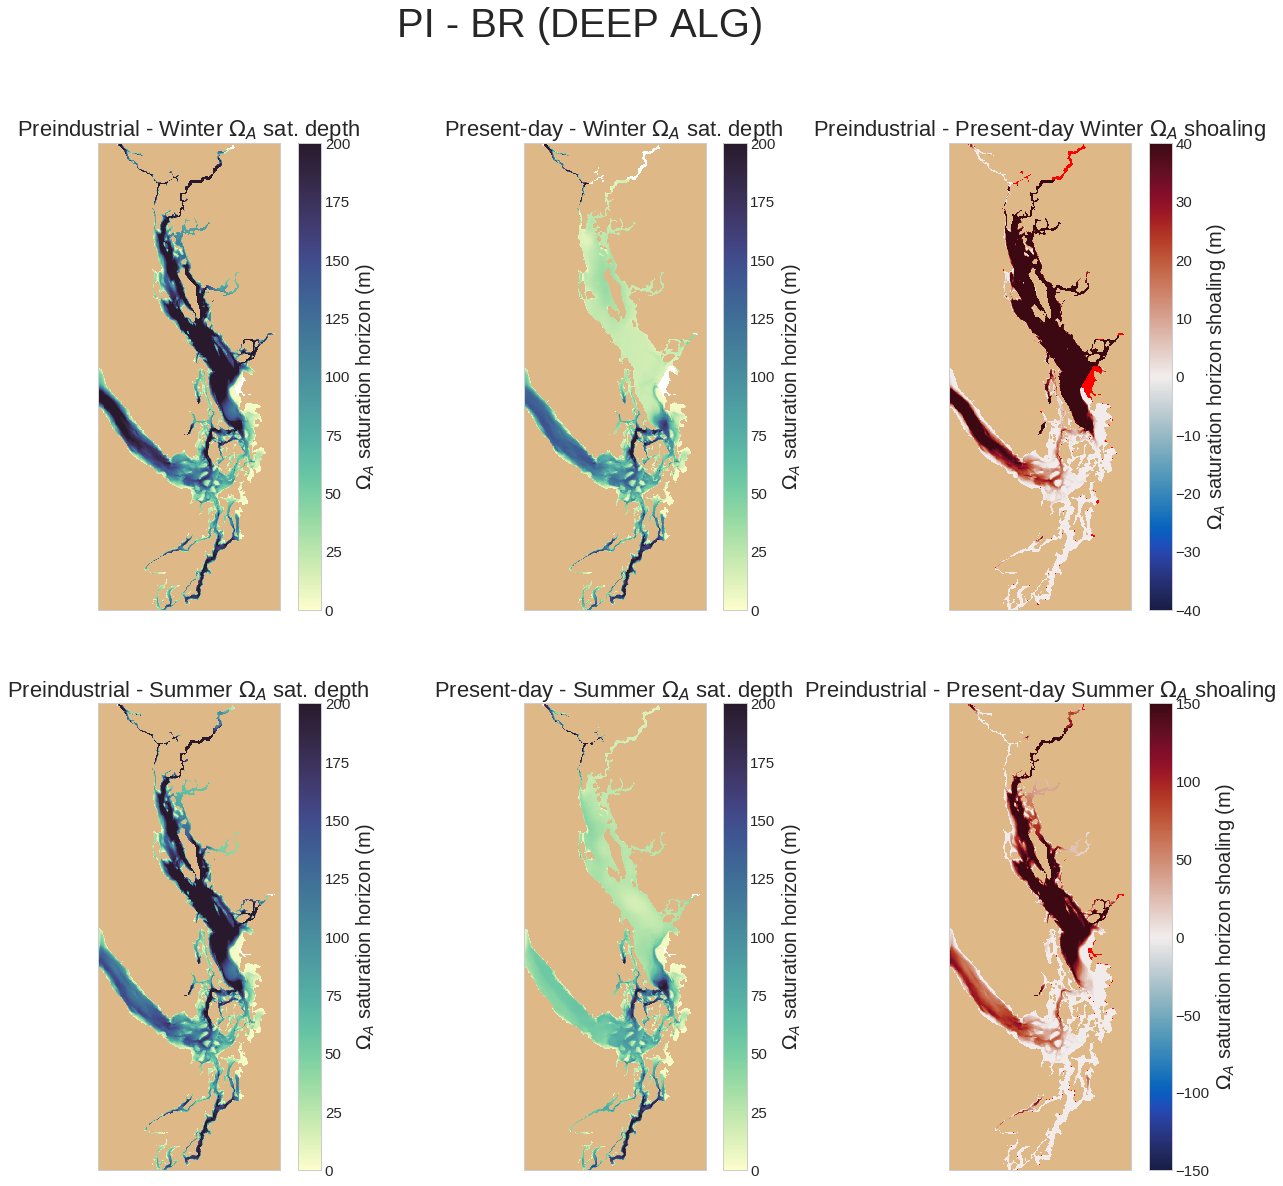

In [15]:
tvmax = 200
#

fig = plt.figure(figsize=(12*1.8,10.5*1.8))

ax1 = fig.add_subplot(2,3,1)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_PI_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=tvmax)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('Preindustrial - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,2)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_br_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=tvmax)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)
 
ax3 = fig.add_subplot(2,3,3)
cmap = cm.cm.balance
tplt = OmA_h_winter_mean_PI_deepalg - OmA_h_winter_mean_br_deepalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=15)
ax3.set_title('Preindustrial - Present-day Winter $\Omega_A$ shoaling', fontsize = 22)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)


ax1 = fig.add_subplot(2,3,4)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_PI_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=tvmax)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)

ax1.set_title('Preindustrial - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,5)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=tvmax)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax3 = fig.add_subplot(2,3,6)
cmap = cm.cm.balance
tplt = OmA_h_summer_mean_PI_deepalg - OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-150, vmax=150)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax3.set_title('Preindustrial - Present-day Summer $\Omega_A$ shoaling', fontsize = 22)
cbar = plt.colorbar(mesh)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)

cmap.set_bad('red')
cmap.set_bad('red')

plt.suptitle('PI - BR (DEEP ALG)', fontsize =40)


In [16]:



reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    print('')
    print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_PI_deepalg - OmA_h_summer_mean_br_deepalg)
    print('average summer sat. hor. (PI): ', np.nanmean(OmA_h_summer_mean_PI_deepalg[reg_mask]))
    OmA_deepAlg_summer['PI'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_PI_deepalg[reg_mask])
    print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask])
    print('PI-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_PI_deepalg - OmA_h_winter_mean_br_deepalg)
    print('average winter sat. hor. (PI): ', np.nanmean(OmA_h_winter_mean_PI_deepalg[reg_mask]))
    OmA_deepAlg_winter['PI'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_PI_deepalg[reg_mask])
    print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask])
    print('PI-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    


JdF
average summer sat. hor. (PI):  98.253685
average summer sat. hor (BR):  44.132675
PI-BR shoaling summer:  54.121014
average winter sat. hor. (PI):  121.74776
average winter sat. hor (BR):  94.554825
PI-BR shoaling winter:  27.460524

N. Sog
average summer sat. hor. (PI):  132.5951
average summer sat. hor (BR):  34.044353
PI-BR shoaling summer:  98.81382
average winter sat. hor. (PI):  141.17476
average winter sat. hor (BR):  30.545181
PI-BR shoaling winter:  109.363846

S. Sog
average summer sat. hor. (PI):  143.39381
average summer sat. hor (BR):  43.55997
PI-BR shoaling summer:  100.208786
average winter sat. hor. (PI):  146.56046
average winter sat. hor (BR):  37.481564
PI-BR shoaling winter:  111.50588

Haro
average summer sat. hor. (PI):  67.92319
average summer sat. hor (BR):  60.36671
PI-BR shoaling summer:  7.5656543
average winter sat. hor. (PI):  68.21524
average winter sat. hor (BR):  66.23699
PI-BR shoaling winter:  1.8858525


In [17]:
# import pickle
#pickle.dump(OmA_deepAlg_summer,'Oma_summer_new.pkl','wb')
pickle.dump(OmA_deepAlg_summer, open("Oma_summer_new_PI.pkl", 'wb'))
pickle.dump(OmA_deepAlg_winter, open("Oma_winter_new_PI.pkl", 'wb'))

## put this in bar-plot form...

In [18]:
#BR
means_deep_summer_BR = np.zeros(4)
for i in range(0,4):
    means_deep_summer_BR[i] = OmA_deepAlg_summer['BR'][reg[i]]
means_deep_winter_BR = np.zeros(4)
for i in range(0,4):
    means_deep_winter_BR[i] = OmA_deepAlg_winter['BR'][reg[i]]

#LA
means_deep_summer_la = np.zeros(4)
for i in range(0,4):
    means_deep_summer_la[i] = OmA_deepAlg_summer['la'][reg[i]]
means_deep_winter_la = np.zeros(4)
for i in range(0,4):
    means_deep_winter_la[i] = OmA_deepAlg_winter['la'][reg[i]]
 
#PI
means_deep_summer_PI = np.zeros(4)
for i in range(0,4):
    means_deep_summer_PI[i] = OmA_deepAlg_summer['PI'][reg[i]]
means_deep_winter_PI = np.zeros(4)
for i in range(0,4):
    means_deep_winter_PI[i] = OmA_deepAlg_winter['PI'][reg[i]]

print('JdF','N. Sog','S. Sog','Haro')  

print('means_deep_summer_BR')
print(means_deep_summer_BR)
print('means_deep_summer_LA')
print(means_deep_summer_la)
print('means_deep_summer_PI')
print(means_deep_summer_PI)
print('')
print('means_deep_winter_BR')
print(means_deep_winter_BR)
print('means_deep_winter_LA')
print(means_deep_winter_la)
print('means_deep_winter_PI')
print(means_deep_winter_PI)



JdF N. Sog S. Sog Haro
means_deep_summer_BR
[44.13267517 34.04435349 43.55997086 60.36671066]
means_deep_summer_LA
[45.48678207 43.258461   55.92960358 63.27298737]
means_deep_summer_PI
[ 98.253685   132.59509277 143.39381409  67.92318726]

means_deep_winter_BR
[94.55482483 30.54518127 37.48156357 66.23699188]
means_deep_winter_LA
[97.08348083 46.57016754 62.43811417 67.43630981]
means_deep_winter_PI
[121.74775696 141.17475891 146.56045532  68.21524048]


Text(0.5, 1.0, 'WINTER HORIZONS')

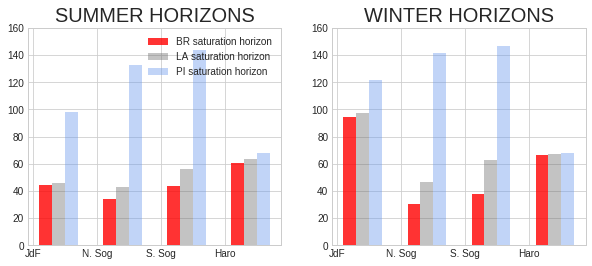

In [19]:
#((nts: colourscheme: BR red, LA dimgrey, PI cornflowerblue))

fx = 13
fy = 4
tstn = 'SE'
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8


rects1 = plt.bar(index+0.4, means_deep_summer_BR, bar_width,
alpha=opacity,
color='red',
label='BR saturation horizon')
rects1 = plt.bar(index+0.6, means_deep_summer_la, bar_width,
alpha=opacity/2,
color='dimgrey',
label='LA saturation horizon')
rects1 = plt.bar(index+0.8, means_deep_summer_PI, bar_width,
alpha=opacity/2,
color='cornflowerblue',
label='PI saturation horizon')

plt.ylim([0,160])
plt.legend(loc = 'best')
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('SUMMER HORIZONS', fontsize = 20)

ax = fig.add_subplot(1,2,2)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8



rects1 = plt.bar(index+0.4, means_deep_winter_BR, bar_width,
alpha=opacity,
color='red',
label='BR saturation horizon')
rects1 = plt.bar(index+0.6, means_deep_winter_la, bar_width,
alpha=opacity/2,
color='dimgrey',
label='LA saturation horizon')
rects1 = plt.bar(index+0.8, means_deep_winter_PI, bar_width,
alpha=opacity/2,
color='cornflowerblue',
label='PI saturation horizon')


plt.ylim([0,160])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('WINTER HORIZONS', fontsize = 20)


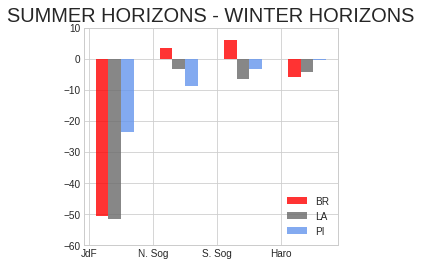

In [20]:
fx = 13
fy = 4
tstn = 'SE'
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8


rects1 = plt.bar(index+0.4, means_deep_summer_BR - means_deep_winter_BR, bar_width,
alpha=opacity,
color='red',
label='BR')
rects1 = plt.bar(index+0.6, means_deep_summer_la - means_deep_winter_la, bar_width,
alpha=opacity,
color='dimgrey',
label='LA')
rects1 = plt.bar(index+0.8, means_deep_summer_PI - means_deep_winter_PI, bar_width,
alpha=opacity,
color='cornflowerblue',
label='PI')

plt.ylim([-60,10])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('SUMMER HORIZONS - WINTER HORIZONS', fontsize = 20)


plt.legend(loc='best')
# #plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

# plt.ylim([0,140])
# plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
# ax.set_title('WINTER HORIZONS', fontsize = 20)


Text(0.5, 1.0, 'WINTER SHOALING')

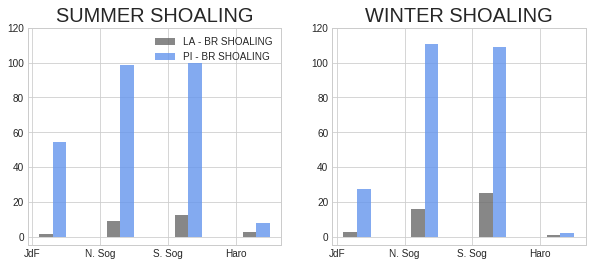

In [21]:
fx = 13
fy = 4
tstn = 'SE'
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8


rects1 = plt.bar(index+0.4, means_deep_summer_la - means_deep_summer_BR, bar_width,
alpha=opacity,
color='dimgrey',
label='LA - BR SHOALING')
rects1 = plt.bar(index+0.6, means_deep_summer_PI - means_deep_summer_BR, bar_width,
alpha=opacity,
color='cornflowerblue',
label='PI - BR SHOALING')

plt.ylim([-5,120])
plt.legend(loc='best')
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('SUMMER SHOALING', fontsize = 20)


ax = fig.add_subplot(1,2,2)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8


rects1 = plt.bar(index+0.4, means_deep_winter_la - means_deep_winter_BR, bar_width,
alpha=opacity,
color='dimgrey',
label='LA - BR SHOALING')
rects1 = plt.bar(index+0.6, means_deep_winter_PI - means_deep_winter_BR, bar_width,
alpha=opacity,
color='cornflowerblue',
label='PI - BR SHOALING')

plt.ylim([-5,120])

plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('WINTER SHOALING', fontsize = 20)


### Those PI horizons seem like crazytalk, but we've seen in the Harley collaboration how sensitive the Strait is right around the $\Omega_A$ = 1 boundary. Let's visualise some actual Omegas, though. Here I'm visualising the Omegas calculated with a depth of 0, since those are used in the above analysis.


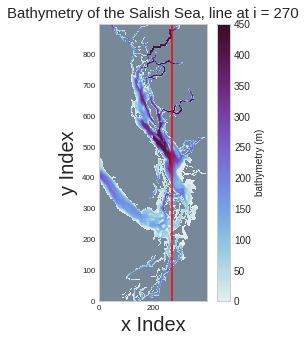

In [22]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
    plt.axvline(x=270, color = 'red')
fact = 0.17
plot_bathy(bath1,'Bathymetry of the Salish Sea, line at i = 270', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

In [23]:
BR_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA_depth_0.nc')
PI_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/PI_OmA_depth_0.nc')
LA_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/LA_OmA_depth_0.nc')


In [24]:
BR_Jan_i270 = np.mean(BR_oma['model_output']['OmA'][0:30,:,:,270], axis = 0)
PI_Jan_i270 = np.mean(PI_oma['model_output']['OmA'][0:30,:,:,270], axis = 0)
BR_Jul_i270 = np.mean(BR_oma['model_output']['OmA'][182:182+30,:,:,270], axis = 0)
PI_Jul_i270 = np.mean(PI_oma['model_output']['OmA'][182:182+30,:,:,270], axis = 0)

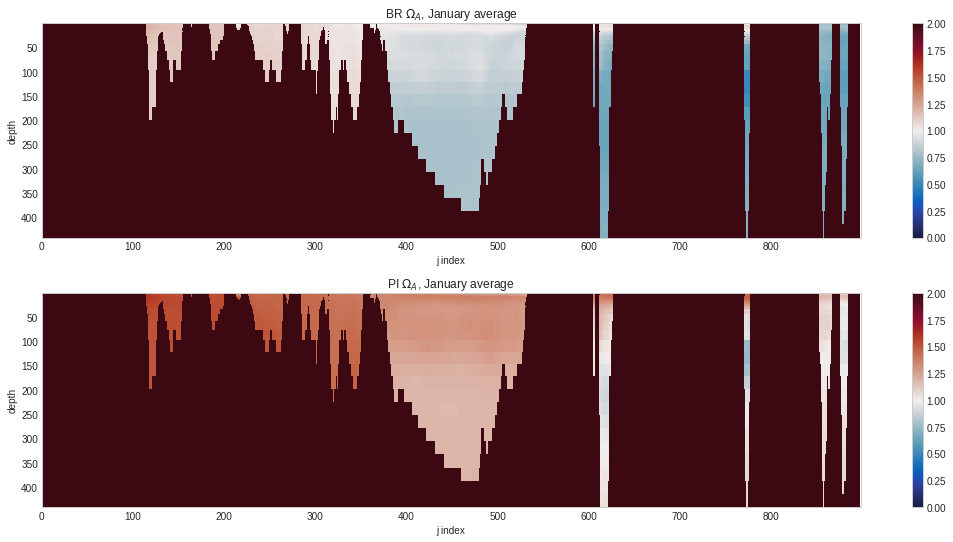

In [25]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
tvmin = 0
tvmax = 2
tcmap = cm.cm.balance

fig = plt.figure(figsize=(15,11))
for i in range(1,4):
    if i == 1:
        section_slice = np.arange(0,898,1)
        section_slice2 = np.arange(0,898,50)
        ax = fig.add_subplot(3,1,i)
        #sd = (BR_Jan_i270)
        tplt = BR_Jan_i270
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('BR $\Omega_A$, January average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('j index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,898])
        
    if i == 2:
        section_slice = np.arange(0,898,1)
        section_slice2 = np.arange(0,898,50)
        ax = fig.add_subplot(3,1,i)
        
        tplt = PI_Jan_i270
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('PI $\Omega_A$, January average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('j index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,898])

plt.tight_layout()

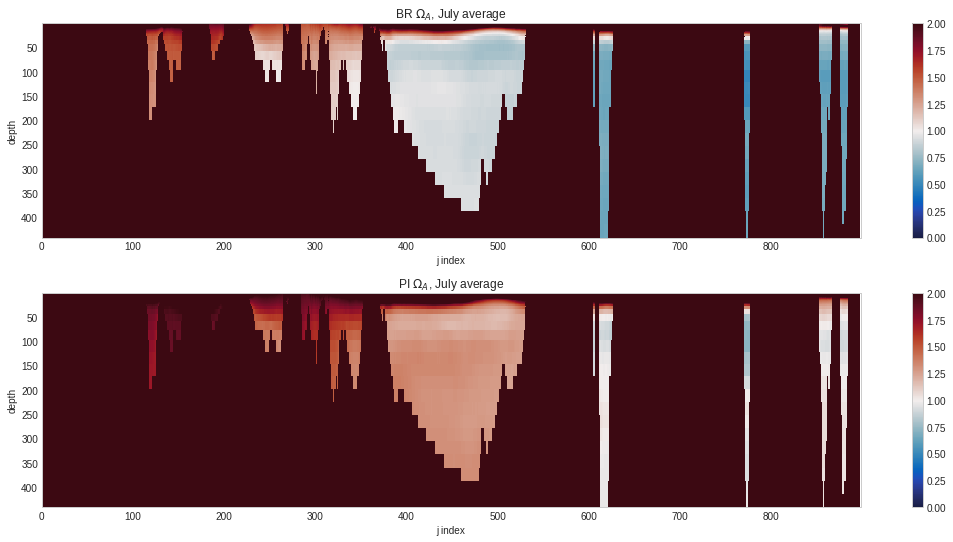

In [26]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
tvmin = 0
tvmax = 2
tcmap = cm.cm.balance

fig = plt.figure(figsize=(15,11))
for i in range(1,4):
    if i == 1:
        section_slice = np.arange(0,898,1)
        section_slice2 = np.arange(0,898,50)
        ax = fig.add_subplot(3,1,i)
        #sd = (BR_Jul_i270)
        tplt = BR_Jul_i270
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('BR $\Omega_A$, July average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('j index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,898])
        
    if i == 2:
        section_slice = np.arange(0,898,1)
        section_slice2 = np.arange(0,898,50)
        ax = fig.add_subplot(3,1,i)
        
        tplt = PI_Jul_i270
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('PI $\Omega_A$, July average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('j index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,898])

plt.tight_layout()

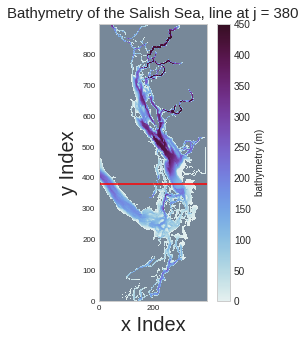

In [27]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
    plt.axhline(y=380, color = 'red')
fact = 0.17
plot_bathy(bath1,'Bathymetry of the Salish Sea, line at j = 380', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

In [28]:
BR_Jan_j380 = np.mean(BR_oma['model_output']['OmA'][0:30,:,380,:], axis = 0)
PI_Jan_j380 = np.mean(PI_oma['model_output']['OmA'][0:30,:,380,:], axis = 0)
BR_Jul_j380 = np.mean(BR_oma['model_output']['OmA'][182:182+30,:,380,:], axis = 0)
PI_Jul_j380 = np.mean(PI_oma['model_output']['OmA'][182:182+30,:,380,:], axis = 0)


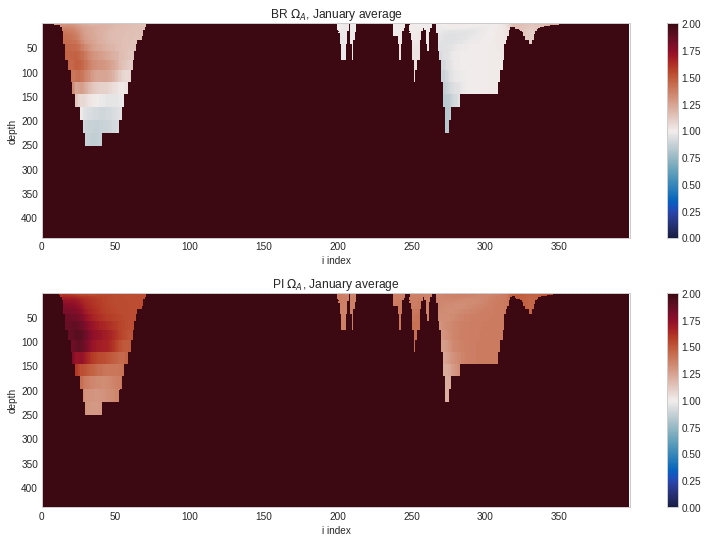

In [29]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
tvmin = 0
tvmax = 2
tcmap = cm.cm.balance

fig = plt.figure(figsize=(11,11))
for i in range(1,4):
    if i == 1:
        section_slice = np.arange(0,398,1)
        section_slice2 = np.arange(0,398,50)
        ax = fig.add_subplot(3,1,i)
        #sd = (BR_Jan_j380)
        tplt = BR_Jan_j380
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('BR $\Omega_A$, January average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('i index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,398])
        
    if i == 2:
        section_slice = np.arange(0,398,1)
        section_slice2 = np.arange(0,398,50)
        ax = fig.add_subplot(3,1,i)
        
        tplt = PI_Jan_j380
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('PI $\Omega_A$, January average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('i index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,398])

plt.tight_layout()

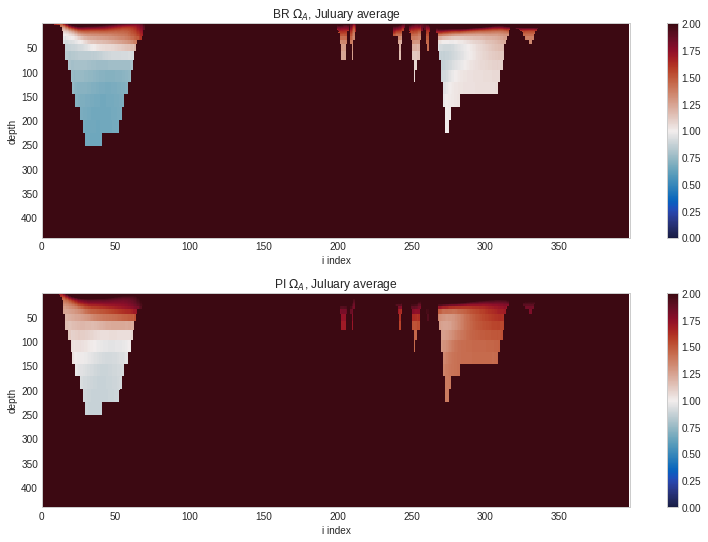

In [30]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
tvmin = 0
tvmax = 2
tcmap = cm.cm.balance

fig = plt.figure(figsize=(11,11))
for i in range(1,4):
    if i == 1:
        section_slice = np.arange(0,398,1)
        section_slice2 = np.arange(0,398,50)
        ax = fig.add_subplot(3,1,i)
        #sd = (BR_Jul_j380)
        tplt = BR_Jul_j380
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('BR $\Omega_A$, Juluary average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('i index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,398])
        
    if i == 2:
        section_slice = np.arange(0,398,1)
        section_slice2 = np.arange(0,398,50)
        ax = fig.add_subplot(3,1,i)
        
        tplt = PI_Jul_j380
        #tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('PI $\Omega_A$, Juluary average') 
        ax.set_ylabel('depth')
        ax.set_xlabel('i index')
        #ax.set_xticks(section_slice)
        #ax.set_xticklabels(section_slice2)
        ax.set_xlim([0,398])

plt.tight_layout()

##### So it seems these 'crazy' horizon shoalings are correct - we just flip to the other side of the fulcrum...I need to recalculate this using the correct Omegas to get the final numbers. Here's a plot of OmA's calculated considering depth and OmA's calculated using depth 0, to understand the magnitude of the effect (dataset = BR run,  all days, all depths, i = 250, j = 250)

# Histograms of Omega A horizon

In [31]:
print(np.shape(Oma_hor_deep_BR))

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

()


In [32]:
#LA_OmA_horizon_DEEPALG_depth_0.nc

LA_hor = Oma_hor_deep_LA['model_output']['OmAr_HORIZON'][:,:,:]
PI_hor = Oma_hor_deep_PI['model_output']['OmAr_HORIZON'][:,:,:]
BR_hor = Oma_hor_deep_BR['model_output']['OmAr_HORIZON'][:,:,:]



In [33]:
print(LA_hor[0,490,280])
LA_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/LA_OmA_depth_0.nc')

print(LA_oma['model_output']['OmA'][0,:,490,280])

nan
[9.1443479e-01 9.9268842e-01 1.0811802e+00 1.1415040e+00 1.1872069e+00
 1.2016505e+00 1.2056785e+00 1.2032928e+00 1.1989342e+00 1.1908461e+00
 1.1837630e+00 1.1759653e+00 1.1663145e+00 1.1557126e+00 1.1449831e+00
 1.1338979e+00 1.1225400e+00 1.1115358e+00 1.0994036e+00 1.0862703e+00
 1.0658777e+00 1.0311278e+00 9.9792856e-01 1.0035135e+00 1.0431448e+00
 1.0437195e+00 9.7842366e-01 9.3540800e-01 9.0845519e-01 1.0000000e+20
 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20
 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20 1.0000000e+20]


In [34]:
step = 10
t_start = 0
t_end = 200
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)



# print(np.nanmin(LA_hor_jan))
# print(np.size(LA_hor_jan[np.isnan(LA_hor_jan)]))
# print(30*898*398)



In [35]:
m = 1; ds = (m-1)*30; de = m*30
LA_hor_jan = LA_hor[ds:de,:,:]
LA_hor_jan_nn = LA_hor_jan[~np.isnan(LA_hor_jan)]
bin_propLA  = manual_hist(LA_hor_jan_nn)
t_LA_jan = np.copy(bin_propLA)

m = 2; ds = (m-1)*30; de = m*30
LA_hor_feb = LA_hor[ds:de,:,:]
LA_hor_feb_nn = LA_hor_feb[~np.isnan(LA_hor_feb)]
bin_propLA  = manual_hist(LA_hor_feb_nn)
t_LA_feb = np.copy(bin_propLA)

m = 3; ds = (m-1)*30; de = m*30
LA_hor_mar = LA_hor[ds:de,:,:]
LA_hor_mar_nn = LA_hor_mar[~np.isnan(LA_hor_mar)]
bin_propLA  = manual_hist(LA_hor_mar_nn)
t_LA_mar = np.copy(bin_propLA)

m = 4; ds = (m-1)*30; de = m*30
LA_hor_apr = LA_hor[ds:de,:,:]
LA_hor_apr_nn = LA_hor_apr[~np.isnan(LA_hor_apr)]
bin_propLA  = manual_hist(LA_hor_apr_nn)
t_LA_apr = np.copy(bin_propLA)

m = 5; ds = (m-1)*30; de = m*30
LA_hor_may = LA_hor[ds:de,:,:]
LA_hor_may_nn = LA_hor_may[~np.isnan(LA_hor_may)]
bin_propLA  = manual_hist(LA_hor_may_nn)
t_LA_may = np.copy(bin_propLA)

m =6; ds = (m-1)*30; de = m*30
LA_hor_jun = LA_hor[ds:de,:,:]
LA_hor_jun_nn = LA_hor_jun[~np.isnan(LA_hor_jun)]
bin_propLA  = manual_hist(LA_hor_jun_nn)
t_LA_jun = np.copy(bin_propLA)

m = 7; ds = (m-1)*30; de = m*30
LA_hor_jul = LA_hor[ds:de,:,:]
LA_hor_jul_nn = LA_hor_jul[~np.isnan(LA_hor_jul)]
bin_propLA  = manual_hist(LA_hor_jul_nn)
t_LA_jul = np.copy(bin_propLA)

m = 8; ds = (m-1)*30; de = m*30
LA_hor_aug = LA_hor[ds:de,:,:]
LA_hor_aug_nn = LA_hor_aug[~np.isnan(LA_hor_aug)]
bin_propLA  = manual_hist(LA_hor_aug_nn)
t_LA_aug = np.copy(bin_propLA)

m = 9; ds = (m-1)*30; de = m*30
LA_hor_sep = LA_hor[ds:de,:,:]
LA_hor_sep_nn = LA_hor_sep[~np.isnan(LA_hor_sep)]
bin_propLA  = manual_hist(LA_hor_sep_nn)
t_LA_sep = np.copy(bin_propLA)

m = 10; ds = (m-1)*30; de = m*30
LA_hor_oct = LA_hor[ds:de,:,:]
LA_hor_oct_nn = LA_hor_oct[~np.isnan(LA_hor_oct)]
bin_propLA  = manual_hist(LA_hor_oct_nn)
t_LA_oct = np.copy(bin_propLA)

m = 11; ds = (m-1)*30; de = m*30
LA_hor_nov = LA_hor[ds:de,:,:]
LA_hor_nov_nn = LA_hor_nov[~np.isnan(LA_hor_nov)]
bin_propLA  = manual_hist(LA_hor_nov_nn)
t_LA_nov = np.copy(bin_propLA)

m = 12; ds = (m-1)*30; de = m*30
LA_hor_dec = LA_hor[ds:de,:,:]
LA_hor_dec_nn = LA_hor_dec[~np.isnan(LA_hor_dec)]
bin_propLA  = manual_hist(LA_hor_dec_nn)
t_LA_dec = np.copy(bin_propLA)


###
m = 1; ds = (m-1)*30; de = m*30
BR_hor_jan = BR_hor[ds:de,:,:]
BR_hor_jan_nn = BR_hor_jan[~np.isnan(BR_hor_jan)]
bin_propBR  = manual_hist(BR_hor_jan_nn)
t_BR_jan = np.copy(bin_propBR)

m = 2; ds = (m-1)*30; de = m*30
BR_hor_feb = BR_hor[ds:de,:,:]
BR_hor_feb_nn = BR_hor_feb[~np.isnan(BR_hor_feb)]
bin_propBR  = manual_hist(BR_hor_feb_nn)
t_BR_feb = np.copy(bin_propBR)

m = 3; ds = (m-1)*30; de = m*30
BR_hor_mar = BR_hor[ds:de,:,:]
BR_hor_mar_nn = BR_hor_mar[~np.isnan(BR_hor_mar)]
bin_propBR  = manual_hist(BR_hor_mar_nn)
t_BR_mar = np.copy(bin_propBR)

m = 4; ds = (m-1)*30; de = m*30
BR_hor_apr = BR_hor[ds:de,:,:]
BR_hor_apr_nn = BR_hor_apr[~np.isnan(BR_hor_apr)]
bin_propBR  = manual_hist(BR_hor_apr_nn)
t_BR_apr = np.copy(bin_propBR)

m = 5; ds = (m-1)*30; de = m*30
BR_hor_may = BR_hor[ds:de,:,:]
BR_hor_may_nn = BR_hor_may[~np.isnan(BR_hor_may)]
bin_propBR  = manual_hist(BR_hor_may_nn)
t_BR_may = np.copy(bin_propBR)

m =6; ds = (m-1)*30; de = m*30
BR_hor_jun = BR_hor[ds:de,:,:]
BR_hor_jun_nn = BR_hor_jun[~np.isnan(BR_hor_jun)]
bin_propBR  = manual_hist(BR_hor_jun_nn)
t_BR_jun = np.copy(bin_propBR)

m = 7; ds = (m-1)*30; de = m*30
BR_hor_jul = BR_hor[ds:de,:,:]
BR_hor_jul_nn = BR_hor_jul[~np.isnan(BR_hor_jul)]
bin_propBR  = manual_hist(BR_hor_jul_nn)
t_BR_jul = np.copy(bin_propBR)

m = 8; ds = (m-1)*30; de = m*30
BR_hor_aug = BR_hor[ds:de,:,:]
BR_hor_aug_nn = BR_hor_aug[~np.isnan(BR_hor_aug)]
bin_propBR  = manual_hist(BR_hor_aug_nn)
t_BR_aug = np.copy(bin_propBR)

m = 9; ds = (m-1)*30; de = m*30
BR_hor_sep = BR_hor[ds:de,:,:]
BR_hor_sep_nn = BR_hor_sep[~np.isnan(BR_hor_sep)]
bin_propBR  = manual_hist(BR_hor_sep_nn)
t_BR_sep = np.copy(bin_propBR)

m = 10; ds = (m-1)*30; de = m*30
BR_hor_oct = BR_hor[ds:de,:,:]
BR_hor_oct_nn = BR_hor_oct[~np.isnan(BR_hor_oct)]
bin_propBR  = manual_hist(BR_hor_oct_nn)
t_BR_oct = np.copy(bin_propBR)

m = 11; ds = (m-1)*30; de = m*30
BR_hor_nov = BR_hor[ds:de,:,:]
BR_hor_nov_nn = BR_hor_nov[~np.isnan(BR_hor_nov)]
bin_propBR  = manual_hist(BR_hor_nov_nn)
t_BR_nov = np.copy(bin_propBR)

m = 12; ds = (m-1)*30; de = m*30
BR_hor_dec = BR_hor[ds:de,:,:]
BR_hor_dec_nn = BR_hor_dec[~np.isnan(BR_hor_dec)]
bin_propBR  = manual_hist(BR_hor_dec_nn)
t_BR_dec = np.copy(bin_propBR)


##
m = 1; ds = (m-1)*30; de = m*30
PI_hor_jan = PI_hor[ds:de,:,:]
PI_hor_jan_nn = PI_hor_jan[~np.isnan(PI_hor_jan)]
bin_propPI  = manual_hist(PI_hor_jan_nn)
t_PI_jan = np.copy(bin_propPI)

m = 2; ds = (m-1)*30; de = m*30
PI_hor_feb = PI_hor[ds:de,:,:]
PI_hor_feb_nn = PI_hor_feb[~np.isnan(PI_hor_feb)]
bin_propPI  = manual_hist(PI_hor_feb_nn)
t_PI_feb = np.copy(bin_propPI)

m = 3; ds = (m-1)*30; de = m*30
PI_hor_mar = PI_hor[ds:de,:,:]
PI_hor_mar_nn = PI_hor_mar[~np.isnan(PI_hor_mar)]
bin_propPI  = manual_hist(PI_hor_mar_nn)
t_PI_mar = np.copy(bin_propPI)

m = 4; ds = (m-1)*30; de = m*30
PI_hor_apr = PI_hor[ds:de,:,:]
PI_hor_apr_nn = PI_hor_apr[~np.isnan(PI_hor_apr)]
bin_propPI  = manual_hist(PI_hor_apr_nn)
t_PI_apr = np.copy(bin_propPI)

m = 5; ds = (m-1)*30; de = m*30
PI_hor_may = PI_hor[ds:de,:,:]
PI_hor_may_nn = PI_hor_may[~np.isnan(PI_hor_may)]
bin_propPI  = manual_hist(PI_hor_may_nn)
t_PI_may = np.copy(bin_propPI)

m =6; ds = (m-1)*30; de = m*30
PI_hor_jun = PI_hor[ds:de,:,:]
PI_hor_jun_nn = PI_hor_jun[~np.isnan(PI_hor_jun)]
bin_propPI  = manual_hist(PI_hor_jun_nn)
t_PI_jun = np.copy(bin_propPI)

m = 7; ds = (m-1)*30; de = m*30
PI_hor_jul = PI_hor[ds:de,:,:]
PI_hor_jul_nn = PI_hor_jul[~np.isnan(PI_hor_jul)]
bin_propPI  = manual_hist(PI_hor_jul_nn)
t_PI_jul = np.copy(bin_propPI)

m = 8; ds = (m-1)*30; de = m*30
PI_hor_aug = PI_hor[ds:de,:,:]
PI_hor_aug_nn = PI_hor_aug[~np.isnan(PI_hor_aug)]
bin_propPI  = manual_hist(PI_hor_aug_nn)
t_PI_aug = np.copy(bin_propPI)

m = 9; ds = (m-1)*30; de = m*30
PI_hor_sep = PI_hor[ds:de,:,:]
PI_hor_sep_nn = PI_hor_sep[~np.isnan(PI_hor_sep)]
bin_propPI  = manual_hist(PI_hor_sep_nn)
t_PI_sep = np.copy(bin_propPI)

m = 10; ds = (m-1)*30; de = m*30
PI_hor_oct = PI_hor[ds:de,:,:]
PI_hor_oct_nn = PI_hor_oct[~np.isnan(PI_hor_oct)]
bin_propPI  = manual_hist(PI_hor_oct_nn)
t_PI_oct = np.copy(bin_propPI)

m = 11; ds = (m-1)*30; de = m*30
PI_hor_nov = PI_hor[ds:de,:,:]
PI_hor_nov_nn = PI_hor_nov[~np.isnan(PI_hor_nov)]
bin_propPI  = manual_hist(PI_hor_nov_nn)
t_PI_nov = np.copy(bin_propPI)

m = 12; ds = (m-1)*30; de = m*30
PI_hor_dec = PI_hor[ds:de,:,:]
PI_hor_dec_nn = PI_hor_dec[~np.isnan(PI_hor_dec)]
bin_propPI  = manual_hist(PI_hor_dec_nn)
t_PI_dec = np.copy(bin_propPI)




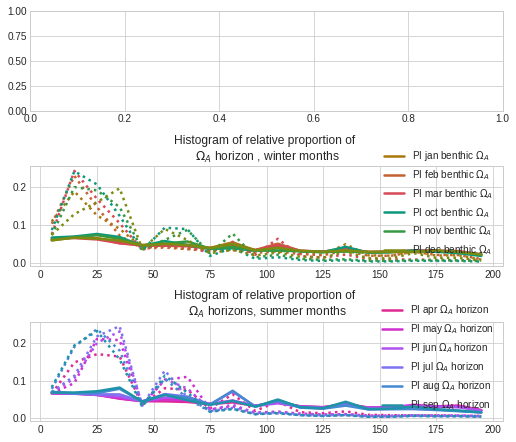

In [36]:
tcm = cm.cm.phase
# d = 
# # tcm(1.*d/12)

fact = 0.52
fig = plt.figure(figsize=(14*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
# ax1.plot(bin_centres,t_PI_year,\
#         color = 'black',linewidth = lw, label = 'PI yearly benthic $\Omega_A$')
# ax1.plot(bin_centres,t_BR_year,\
#         color = 'black',linewidth = lw, linestyle = ':', \
#         label = 'BR yearly benthic $\Omega_A$')
# ax1.legend(loc = 'upper right')
# ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values')
# plt.axvline(x=1, color = 'red')
# w = ax1.set_xticks(np.arange(0, 3, step=0.2))
# w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

ax1 = fig.add_subplot(3,1,2)
#months
ax1.plot(bin_centres,t_PI_jan,\
        color = tcm(1.*0/12),linewidth = lw, label = 'PI jan benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jan,\
        color = tcm(1.*0/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_feb,\
        color = tcm(1.*1/12),linewidth = lw, label = 'PI feb benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_feb,\
        color = tcm(1.*1/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_mar,\
        color = tcm(1.*2/12),linewidth = lw, label = 'PI mar benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_mar,\
        color = tcm(1.*2/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_oct,\
        color = tcm(1.*9/12),linewidth = lw, label = 'PI oct benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_oct,\
        color = tcm(1.*9/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_nov,\
        color = tcm(1.*10/12),linewidth = lw, label = 'PI nov benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_nov,\
        color = tcm(1.*10/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_dec,\
        color = tcm(1.*11/12),linewidth = lw, label = 'PI dec benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_dec,\
        color = tcm(1.*11/12),linewidth = lw, linestyle = ':')
#
ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of \n $\Omega_A$ horizon , winter months ')
#plt.axvline(x=1, color = 'red')
# w = ax1.set_xticks(np.arange(0, 3, step=0.2))
# w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

##
ax1 = fig.add_subplot(3,1,3)
ax1.plot(bin_centres,t_PI_apr,\
        color = tcm(1.*3/12),linewidth = lw, label = 'PI apr $\Omega_A$ horizon')
ax1.plot(bin_centres,t_BR_apr,\
        color = tcm(1.*3/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_may,\
        color = tcm(1.*4/12),linewidth = lw, label = 'PI may $\Omega_A$ horizon')
ax1.plot(bin_centres,t_BR_may,\
        color = tcm(1.*4/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_jun,\
        color = tcm(1.*5/12),linewidth = lw, label = 'PI jun $\Omega_A$ horizon')
ax1.plot(bin_centres,t_BR_jun,\
        color = tcm(1.*5/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_jul,\
        color = tcm(1.*6/12),linewidth = lw, label = 'PI jul $\Omega_A$ horizon')
ax1.plot(bin_centres,t_BR_jul,\
        color = tcm(1.*6/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_aug,\
        color = tcm(1.*7/12),linewidth = lw, label = 'PI aug $\Omega_A$ horizon')
ax1.plot(bin_centres,t_BR_aug,\
        color = tcm(1.*7/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_sep,\
        color = tcm(1.*8/12),linewidth = lw, label = 'PI sep $\Omega_A$ horizon')
ax1.plot(bin_centres,t_BR_sep,\
        color = tcm(1.*8/12),linewidth = lw, linestyle = ':')

ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of \n $\Omega_A$ horizons, summer months ')
# plt.axvline(x=1, color = 'red')
# w = ax1.set_xticks(np.arange(0, 3, step=0.2))
# w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

plt.tight_layout()

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text yticklabel objects>)

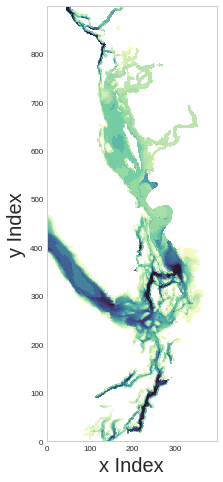

In [37]:
d = 2
fig, ax = plt.subplots(1, 1, figsize=(5, 8), sharey=True)
t_cmap = cm.cm.deep

tplt = LA_hor_jan[0,:,:]
v_min = 0
v_max = 200

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

plt.xlim([0,398])
plt.ylim([0,898])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

In [38]:
BR_oma_d0 = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA_depth_0.nc')
BR_oma = nc.Dataset('../KEY_OMA/OMA_current_NCS/BR_OmA.nc')

d0_test = BR_oma_d0['model_output']['OmA'][:,:,250,250]
dcor_test = BR_oma['model_output']['OmA'][:,:,250,250]


FileNotFoundError: [Errno 2] No such file or directory: b'../KEY_OMA/OMA_current_NCS/BR_OmA.nc'

In [ ]:
d0_test[d0_test>1e10] = np.nan
dcor_test[dcor_test>1e10] = np.nan

In [ ]:
plt.plot(d0_test,dcor_test,'r.')

plt.plot([0.7,2.4],[0.7,2.4],'-bo')
plt.xlabel('Omega A - calculated with depth of 0')
plt.ylabel('Omega A - calculated with correct depth')

##### So using a depth of 0 actually overestimates the Omega. Not by much, but I do need to recalculate the horizon with correct values...

## comparison of old and new calculation, for BR and LA values

The algorithm I use to calculate the horizon (the 'deep' algorithm) is the same in the old calculation and the recalculation, but the OmA values I calculate are slightly different. (See KEY_OMA/compare_old_new_horizon_and_Oma_code.ipynb). The actual omega_a is calculated here:
/KEY_OMA/EXTRACT_HORIZON_08jan20/PI_oma_ph_extract.py

And the mocsy setup is: 
    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup
    
My guess is that before I was considering depth and now I'm not - I set depth to 0. It actually makes quite a big difference. This probably means I have to rerun this calculation using the correct depth. Well, at least the pipeline is set up...



In [ ]:
tsal = 35
ttemp = 10
tta = 2200
tdic = 2050
tdepth = 100
tpressure = 1

tsra = np.ravel(tsal)
ttera = np.ravel(ttemp)
ttara = np.ravel(tta) * 1e-3
tdra = np.ravel(tdic) * 1e-3
tzero = np.zeros_like(tsra)
tpressure = np.zeros_like(tsra)
tpressure[:] =1


tsra_psu = tsra*35/35.16504
ttera_is = gsw.t_from_CT(tsra,ttera,tzero)


In [ ]:
tdepth = 300
tpressure = 1

response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                   sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print('Omega A at depth: '+str(tdepth)+',pres atm: '+str(tpressure)+': '+str(OmegaA))

tdepth = 0
tpressure = 1
response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                   sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print('Omega A at depth: '+str(tdepth)+',pres atm: '+str(tpressure)+': '+str(OmegaA))

print('')
tdepth = 300
tpressure = 0

response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                   sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print('Omega A at depth: '+str(tdepth)+',pres atm: '+str(tpressure)+': '+str(OmegaA))

tdepth = 0
tpressure = 0
response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                   sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print('Omega A at depth: '+str(tdepth)+',pres atm: '+str(tpressure)+': '+str(OmegaA))


In [ ]:

Oma_summer_new = pickle.load(open('./Oma_summer_new.pkl', 'rb'))   
Oma_summer_old = pickle.load(open('./Oma_summer_old.pkl', 'rb'))  

Oma_winter_new = pickle.load(open('./Oma_winter_new.pkl', 'rb'))   
Oma_winter_old = pickle.load(open('./Oma_winter_old.pkl', 'rb'))  



In [ ]:
print('*** LA (used to be called PI) VALUES COMPARISON ***')
print('new summer -LA')
print(Oma_summer_new['la'])
print('old summer -LA')
print(Oma_summer_old['PI'])
print('')
print('new winter -LA')
print(Oma_winter_new['la'])
print('old winter - LA')
print(Oma_winter_old['PI'])
print('')
print('*** BR VALUES COMPARISON ***')
print('new summer -BR')
print(Oma_summer_new['BR'])
print('old summer -BR')
print(Oma_summer_old['BR'])
print('')
print('new winter -BR')
print(Oma_winter_new['BR'])
print('old winter - BR')
print(Oma_winter_old['BR'])
